## Background

Here we'll predict the probability of delay of the flights that land or take off from the airport of Santiago de Chile (SCL). This document covers data manipulation, machine learning and visualization of results.

This analysis is fully based in Python's libraries. It used pandas and numpy for data manipulation, matplotlib and seaborn for visualization and sklearn for machine learning.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
import sklearn as sk

from utils import *

In [2]:
df = pd.read_csv('dataset_SCL.csv')

/tmp/ipykernel_44232/3467307737.py:1: DtypeWarning: Columns (1,6) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('dataset_SCL.csv')


## Exploring the data 🔍

Let's take a brief look into the data

In [3]:
df.head(5)

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES
0,2017-01-01 23:30:00,226,SCEL,KMIA,AAL,2017-01-01 23:33:00,226,SCEL,KMIA,AAL,1,1,2017,Domingo,I,American Airlines,Santiago,Miami
1,2017-01-02 23:30:00,226,SCEL,KMIA,AAL,2017-01-02 23:39:00,226,SCEL,KMIA,AAL,2,1,2017,Lunes,I,American Airlines,Santiago,Miami
2,2017-01-03 23:30:00,226,SCEL,KMIA,AAL,2017-01-03 23:39:00,226,SCEL,KMIA,AAL,3,1,2017,Martes,I,American Airlines,Santiago,Miami
3,2017-01-04 23:30:00,226,SCEL,KMIA,AAL,2017-01-04 23:33:00,226,SCEL,KMIA,AAL,4,1,2017,Miercoles,I,American Airlines,Santiago,Miami
4,2017-01-05 23:30:00,226,SCEL,KMIA,AAL,2017-01-05 23:28:00,226,SCEL,KMIA,AAL,5,1,2017,Jueves,I,American Airlines,Santiago,Miami


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68206 entries, 0 to 68205
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Fecha-I    68206 non-null  object
 1   Vlo-I      68206 non-null  object
 2   Ori-I      68206 non-null  object
 3   Des-I      68206 non-null  object
 4   Emp-I      68206 non-null  object
 5   Fecha-O    68206 non-null  object
 6   Vlo-O      68205 non-null  object
 7   Ori-O      68206 non-null  object
 8   Des-O      68206 non-null  object
 9   Emp-O      68206 non-null  object
 10  DIA        68206 non-null  int64 
 11  MES        68206 non-null  int64 
 12  AÑO        68206 non-null  int64 
 13  DIANOM     68206 non-null  object
 14  TIPOVUELO  68206 non-null  object
 15  OPERA      68206 non-null  object
 16  SIGLAORI   68206 non-null  object
 17  SIGLADES   68206 non-null  object
dtypes: int64(3), object(15)
memory usage: 9.4+ MB


In [5]:
df.describe()

,DIA,MES,AÑO
count,68206.000000,68206.000000,68206.000000
mean,15.714790,6.622585,2017.000029
std,8.782886,3.523321,0.005415
min,1.000000,1.000000,2017.000000
25%,8.000000,3.000000,2017.000000
50%,16.000000,7.000000,2017.000000
75%,23.000000,10.000000,2017.000000
max,31.000000,12.000000,2018.000000


### Conclusions

1. More flights departure around the middle of the month and between months of July and August
2. Data is majority **categorical** with DIA, MES and AÑO as **integers**
3. Feature Vlo-O has one **missing value**

## Data management 🗃️

As the data don't include a column about delay.

In [6]:
df['Fecha-I'] = pd.to_datetime(df['Fecha-I'])
df['Fecha-O'] = pd.to_datetime(df['Fecha-O'])

In [7]:
df_synth = pd.DataFrame()
df_synth['high_season'] = np.where(pd.to_datetime(df['Fecha-I']).map(is_high_season),1,0)
df_synth['min_diff'] = (df['Fecha-I'].dt.hour - df['Fecha-O'].dt.hour)*60 + (df['Fecha-I'].dt.minute - df['Fecha-O'].dt.minute)
df_synth['delay_15'] = np.where(df_synth['min_diff'].map(lambda x: x < 0 and np.abs(x) > 15), 1, 0)
df_synth['period_day'] = pd.to_datetime(df['Fecha-I']).map(which_period_day)
df_synth.to_csv('synthetic_features.csv', index=False)

df = pd.concat([df, df_synth], axis=1)

## Delay Ratio

Now we have the data cleaned and synthetic columns with more information. We can plot

1. By  **destination** (Des-I), **airline** (Emp-I), **day** (DIANOM) of the week and **month** (MES) of the year.
2. By **season** (high_season) and **type** of flight (TIPOVUELO) 

$$ delay\_ratio = \frac{total\_delays}{total\_flights} $$

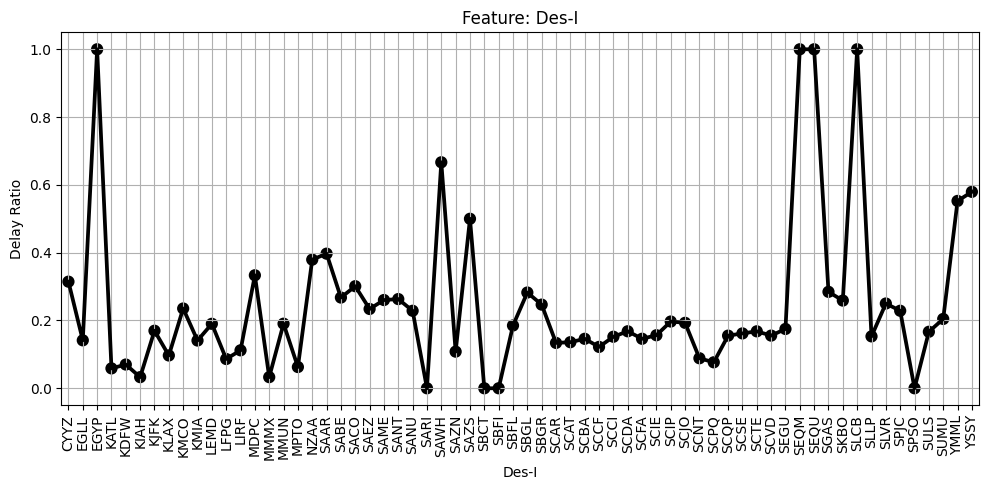

In [8]:
plot_rate_delay(df, ['Des-I'])

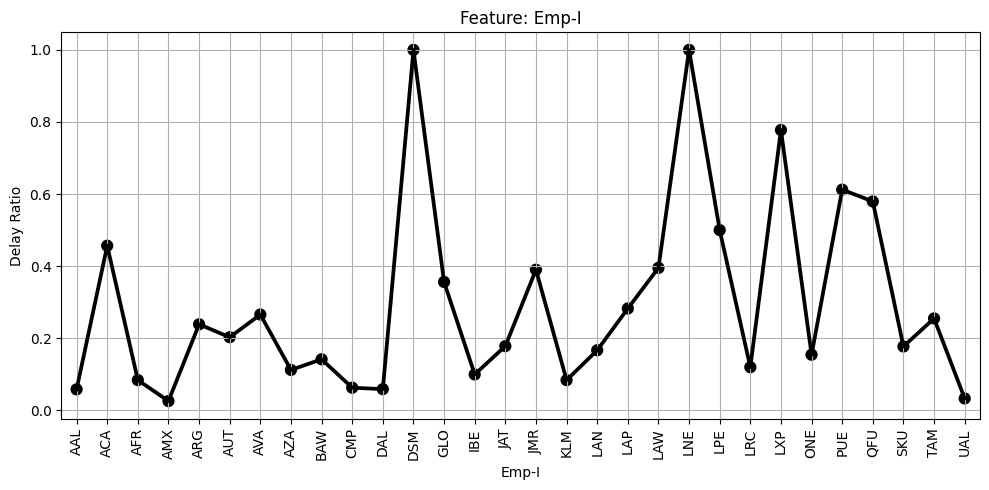

In [17]:
plot_rate_delay(df, ['Emp-I'])

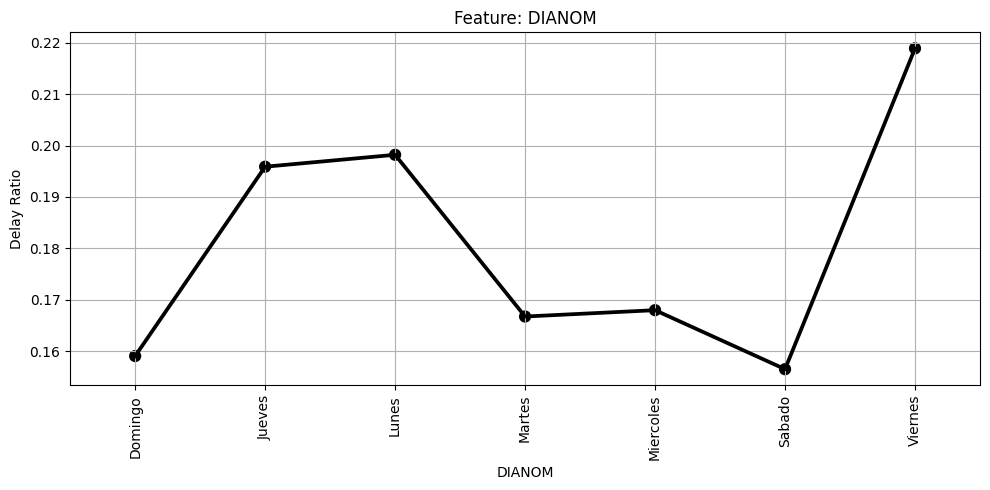

In [18]:
plot_rate_delay(df, ['DIANOM'])

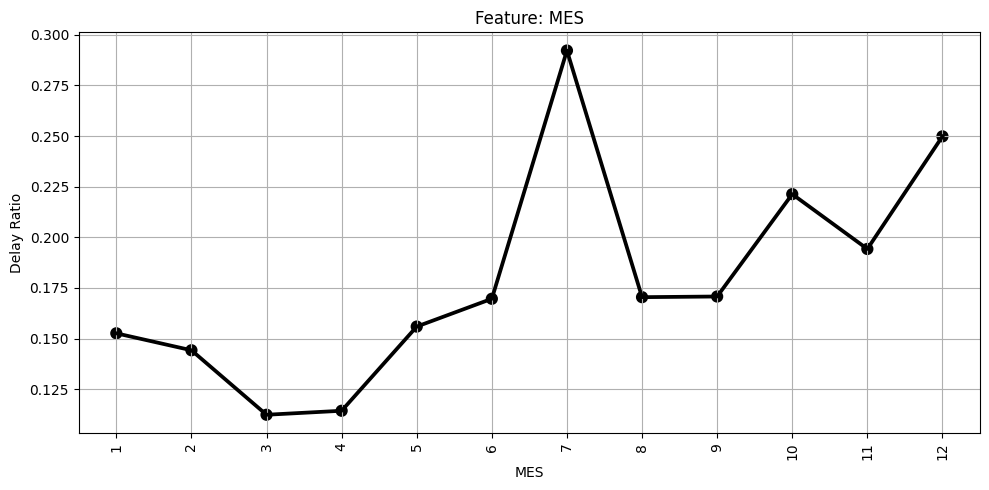

In [19]:
plot_rate_delay(df, ['MES'])

## Machine learning 🤖